Some of the code in this lab was taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution

# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to build them using Keras, its time to practice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

In this lab you will: 

- Load images from a hierarchical file structure using an image datagenerator 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 
- Visualize and evaluate the performance of CNN models 

## Loading the Images

The data for this lab concerns lung xray images for pneumonia. The original dataset is from Kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately one hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **chest_xray**, of this repository. 

In [1]:
# Load the images; be sure to also preprocess these into tensors 

train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/' 

In [21]:
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [27]:
# finding out how many images are in each directory
train_imgs = [file for file in os.listdir(train_dir+'/NORMAL') if file.endswith('.jpeg')] + [
   file for file in os.listdir(train_dir+'/PNEUMONIA') if file.endswith('.jpeg')]
print('length of train images:', len(train_imgs))

val_imgs = [file for file in os.listdir(validation_dir+'/NORMAL') if file.endswith('.jpeg')] + [
   file for file in os.listdir(validation_dir+'/PNEUMONIA') if file.endswith('.jpeg')]
print('length of validation images:', len(val_imgs))

test_imgs = [file for file in os.listdir(test_dir+'/NORMAL') if file.endswith('.jpeg')] + [
   file for file in os.listdir(test_dir+'/PNEUMONIA') if file.endswith('.jpeg')]
print('length of test images:', len(test_imgs))

length of train images: 1738
length of validation images: 4
length of test images: 208


In [29]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution

# Creating data generators to help get the data in a usable form
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,
                                                                  target_size=(150, 150), # reshape all images to be 150 x 150
                                                                  batch_size = 20,
                                                                  class_mode = 'binary') # set class mode to binary

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir,
                                                                  target_size=(150, 150), # reshape all images to be 150 x 150
                                                                  batch_size = 20,
                                                                  class_mode = 'binary') # set class mode to binary

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                                  target_size=(150, 150), # reshape all images to be 150 x 150
                                                                  batch_size = 20,
                                                                  class_mode = 'binary') # set class mode to binary

Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


## Designing the Model

Now it's time to design your CNN using Keras! Remember a few things when doing this: 

- You should alternate convolutional and pooling layers
- You should have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [31]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
# Your code here; design and compile the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))     

In [33]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [34]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
# Set the model to train 
# ⏰ This cell may take several minutes to run 
history = model.fit_generator(train_gen,
                             epochs=30,
                             steps_per_epoch=100,
                             validation_data=val_gen,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 46s 465ms/step - loss: 0.4820 - acc: 0.7881 - val_loss: 0.8594 - val_acc: 0.7500
Epoch 2/30
100/100 [==============================] - 45s 446ms/step - loss: 0.2557 - acc: 0.8990 - val_loss: 0.8292 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 45s 450ms/step - loss: 0.1745 - acc: 0.9319 - val_loss: 0.8383 - val_acc: 0.7500
Epoch 4/30
100/100 [==============================] - 45s 451ms/step - loss: 0.1333 - acc: 0.9475 - val_loss: 1.5116 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 45s 449ms/step - loss: 0.1083 - acc: 0.9599 - val_loss: 0.8454 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 46s 458ms/step - loss: 0.0998 - acc: 0.9550 - val_loss: 0.6453 - val_acc: 0.7500
Epoch 7/30
100/100 [==============================] - 47s 474ms/step - loss: 0.0814 - acc: 0.9695 - val_loss: 0.7102 - val_acc: 0.7500
Epoch 8/30
100/100 [==============================] - 4

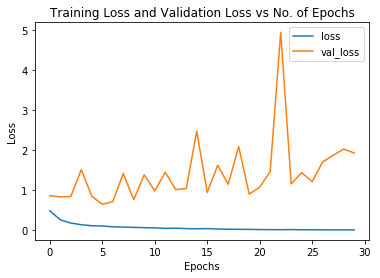

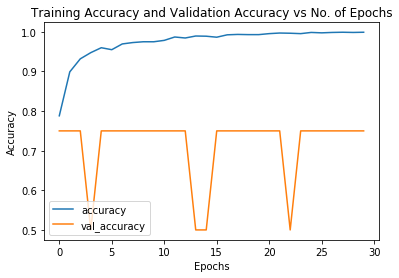

In [36]:
# Plot history
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Validation Loss vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.title('Training Accuracy and Validation Accuracy vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save the Model

In [37]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
# Your code here; save the model for future reference 
model.save('chest_xray_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.** 

In [ ]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
# Add data augmentation to the model setup and set the model to train; 
# See warnings above if you intend to run this block of code 
# ⏰ This cell may take several hours to run 

train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                             target_size=(150, 150),
                                              batch_size=32,
                                              class_mode='binary')

val_gen = test_datagen.flow_from_directory(validation_dir,
                                           target_size=(150, 150)
                                           batch_size=32,
                                           class_mode='binary')

history = model.fit_generator(train_gen,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=val_gen,
                             validation_steps=50)
                                     

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss', label='val_loss'])
plt.title('Training Loss and Validation Loss vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.title('Training Accuracy and Validation Accuracy vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Save the model for future reference.  

In [ ]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
# Save the model 
model.save('chest_xray_downsampled_with_augmentation_data.h5')

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice. 

In [38]:
# this code taken from the solution at https://github.com/learn-co-curriculum/dsc-building-a-cnn-from-scratch/tree/solution
# Your code here 
# Perform a final evaluation using the test set
model.evaluate_generator(test_gen, steps=50)

[0.5327368378639221, 0.769957959651947]

## Level Up (Optional): Adding More Data to the Model

As discussed, the current dataset we worked with is a subset of a dataset hosted on Kaggle. Increasing the data that we use to train the model will result in additional performance gains but will also result in longer training times and be more resource intensive.   

⏰ It is estimated that training on the full dataset will take approximately 4 hours (and potentially significantly longer) depending on your computer's specifications.

In order to test the impact of training on the full dataset, start by downloading the data from Kaggle here: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.   

In [ ]:
# Optional extension; Your code here
# ⏰ This cell may take several hours to run 

## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.